# Perkenalan

### - Nama : Raymond Samuel
### - Batch : RMT-030

## Link Dashboard
https://public.tableau.com/views/Milestones1_17122205422570/Dashboard1?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

## Identifikasi Masalah

### SMART
- Specific : Mengurangi jumlah produk yang slow-moving product pada inventory
- Measurable : Mengurangi jumlah produk slow-moving di inventory sebesar 20% dalam 6 bulan ke depan.
- Achiveable : Berdasarkan analisis data penjualan sebelumnya dan tren pasar, pengurangan jumlah produk slow-moving sebesar 20% dalam 6 bulan ke depan dianggap realistis dan dapat dicapai.
- Relevant : Mengurangi jumlah produk slow-moving krusial dengan tujuan bisnis keseluruhan Superstore Giant untuk meningkatkan efisiensi pengelolaan stok dan efisiensi pada penjualan.
- Time-bound : Tujuan mengurangi jumlah produk slow-mobing producrt harus di capai dalam kurun waktu 6 bulan kedepan 

### Problem Statement

Superstore Giant bertujuan untuk meningkatkan efisiensi pengelolaan stok dan penjualan dengan mengurangi jumlah produk slow-moving di inventory(gudang) sebesar 20% dalam kurun waktu 6 bulan ke depan

### 5W+1H:

- Bagaimana tren dari kelesuruhan data (2015-2018)?
- Customer segment mana yang menghasilkan sales tertinggi dan terendah?
- Apa kategori produk terjual yang tertinggi dari sales 2015-2018
- Apa sub-category produk yang merupakan slow-moving product atau produk yang paling sedikit penjualan?
- Berapa rata-rata sales tahunan nya?
- Yang mana lebih baik? Untuk rata-rata penjualan pada Region East atau West? 
- Adakah corelasi antara nilai sales dan region tertentu?

### Dataset
https://www.kaggle.com/datasets/bhanupratapbiswas/superstore-sales/data

# Data Loading

In [1]:
## Import function
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
## Load Data
raw_data = pd.read_csv("superstore_final_dataset (1).csv", encoding='latin-1')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [3]:
raw_data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [4]:
## ada beberapa kategori
raw_data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [5]:
## ada beberapa sub kategori
raw_data['Sub_Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

# Data Cleaning

In [6]:
df = raw_data.copy()
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')

In [7]:
## Drop columns yang tidak perlu
df.drop(columns=['Row_ID','Customer_ID','Customer_Name','State','Postal_Code','Product_ID'], axis=1, inplace=True)

In [8]:
## Cek Null / Miss Value
df.notnull().count()

Order_ID        9800
Order_Date      9800
Ship_Date       9800
Ship_Mode       9800
Segment         9800
Country         9800
City            9800
Region          9800
Category        9800
Sub_Category    9800
Product_Name    9800
Sales           9800
dtype: int64

In [9]:
## Tidak melakukan handring outlier karena data penjualan berdasarkan tanggal

In [10]:
## Ubah order tipe data date
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d/%m/%Y')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format='%d/%m/%Y')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order_ID      9800 non-null   object        
 1   Order_Date    9800 non-null   datetime64[ns]
 2   Ship_Date     9800 non-null   datetime64[ns]
 3   Ship_Mode     9800 non-null   object        
 4   Segment       9800 non-null   object        
 5   Country       9800 non-null   object        
 6   City          9800 non-null   object        
 7   Region        9800 non-null   object        
 8   Category      9800 non-null   object        
 9   Sub_Category  9800 non-null   object        
 10  Product_Name  9800 non-null   object        
 11  Sales         9800 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(9)
memory usage: 918.9+ KB


# Analisis & Perhitungan

## Bagaimana tren dari kelesuruhan data (2015-2018)?

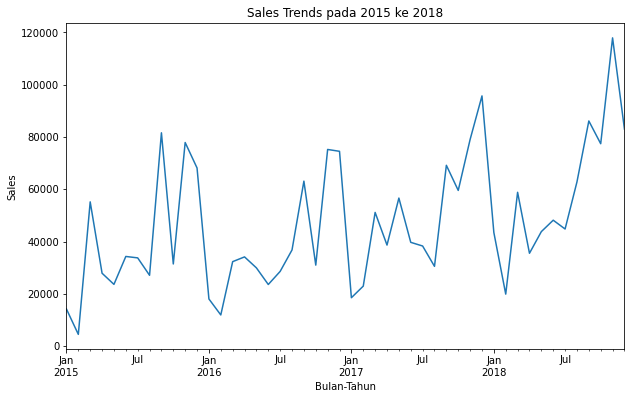

In [12]:
## Copy df
trend = df.copy()

## tambah col year_month
trend['Year_Month'] = trend['Order_Date'].dt.to_period('M')

## jumlah sales perbulan
sales_trends = trend.groupby('Year_Month')['Sales'].sum()

# Plot data
plt.figure(figsize=(10,6))
sales_trends.plot(kind='line')
plt.title('Sales Trends pada 2015 ke 2018')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Sales')
plt.show()

- Tren penjualan umumnya hampir sama sepanjang tahun. Dalam beberapa bulan, penjualan naik dan turun. Tahun 2018 adalah tahun dengan penjualan tertinggi.

## Customer segment mana yang menghasilkan sales tertinggi dan terendah?

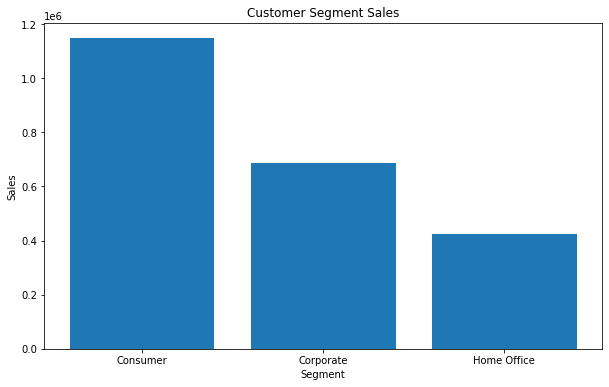

In [13]:
# Create a copy of the dataframe
segment_sales = df.copy()

# Group data by 'Segment' and calculate total sales
segment_sales = segment_sales.groupby('Segment')['Sales'].sum().reset_index()

# Plot data using matplotlib
plt.figure(figsize=(10,6))
plt.bar(segment_sales['Segment'], segment_sales['Sales'])
plt.title("Customer Segment Sales")
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()


- Customer segmen tertinggi yaitu consumer sedangkan terendah yaitu home office

## Apa kategori produk terjual yang tertinggi dari sales 2015-2018

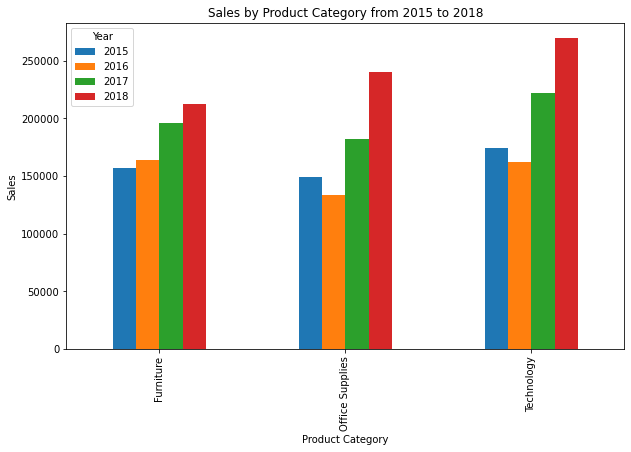

In [14]:
sales_categ = df.copy()

## Tambah col y
sales_categ['Year'] = sales_categ['Order_Date'].dt.year

## Kelompokkan data berdasarkan Kategori dan Tahun, lalu hitung total penjualan
sales_by_category = sales_categ.groupby(['Category', 'Year'])['Sales'].sum()

## Ubah data menjadi format pivot sehingga setiap tahun menjadi kolom terpisah
sales_by_category_pivot = sales_by_category.unstack()

## Plot data
sales_by_category_pivot.plot(kind='bar', figsize=(10,6))
plt.title('Sales by Product Category from 2015 to 2018')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.show()

- Teknologi merupakan kategori yang paling populer, sedangkan Office supply merupakan kategori yang paling tidak populer

## Apa sub-category produk yang merupakan slow-moving product atau produk yang paling sedikit penjualan?

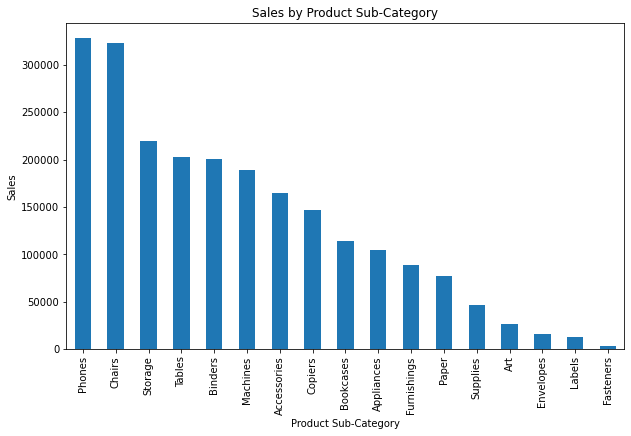

In [15]:
## Kelompokkan data berdasarkan Sub_Kategori dan hitung total penjualan
sales_by_subcategory = df.groupby('Sub_Category')['Sales'].sum()

## Urutkan data
sales_by_subcategory = sales_by_subcategory.sort_values(ascending=False)

## Plot data
sales_by_subcategory.plot(kind='bar', figsize=(10,6))
plt.title('Sales by Product Sub-Category')
plt.xlabel('Product Sub-Category')
plt.ylabel('Sales')
plt.show()

- dilihat dari sub kategori, barang dengan sub-category fasterners adalah barang yang bisa di sebut slow-moving product karena memiliki sales paling rendah
- penjualan phones dan chairs merupakan yang terbaik

## Berapa rata-rata sales tahunan nya?

In [16]:
## copy
sales_year = df.copy()

## Tambahkan kolom 'Year'
sales_year['Year'] = sales_year['Order_Date'].dt.year

## Kelompokkan data berdasarkan tahun dan hitung rata-rata penjualan
average_sales_per_year = sales_year.groupby('Year')['Sales'].mean()

print(average_sales_per_year)

Year
2015    245.702103
2016    223.569832
2017    236.855781
2018    221.624315
Name: Sales, dtype: float64


- dapat dilihat rata-rata sales tahunan paling tinggi pada tahun 2015

## Yang mana lebih baik? Untuk rata-rata penjualan pada Region East atau West? 

- H0 : Rata-rata penjualan tahunan East == West
- H1 : Rata-rata penjualan tahunan East != West

In [17]:
## Filter data untuk region East dan West
East = df[df['Region'] == 'East']
West = df[df['Region'] == 'West']

t_stat, p_val = stats.ttest_ind(East['Sales'], West['Sales'])

print('T-Statistic:', t_stat)
print('P-value:', p_val)

T-Statistic: 0.9507083426361699
P-value: 0.34179124309767406


- hasil p value lbh kecil dari critical value, maka h0 ditolak, sehingga rata-rata penjualan east dan west berbeda

## Adakah corelasi antara nilai sales dan region tertentu?

In [18]:
## Filter
east_sales = df[df['Region'] == 'East']['Sales']
west_sales = df[df['Region'] == 'West']['Sales']

# Pastikan kedua data memiliki jumlah yang sama
if len(east_sales) != len(west_sales):
    min_len = min(len(east_sales), len(west_sales))
    east_sales = east_sales[:min_len]
    west_sales = west_sales[:min_len]

## Hitung korelasi Pearson
corr_r, pval_p = stats.pearsonr(east_sales, west_sales)

## Hitung korelasi Spearman
corr_rho, pval_s = stats.spearmanr(east_sales, west_sales)

## Hitung korelasi Kendall
corr_tau, pval_k = stats.kendalltau(east_sales, west_sales)

print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

r-correlation: -0.01, p-value: 0.5667471210758276
rho-correlation: 0.01, p-value: 0.6341467114183323
tau-correlation: 0.01, p-value: 0.6252178599518909


- Hasil yang didapatkan menunjukkan bahwa korelasi antara penjualan di region East dan West sangat lemah. Nilai korelasi mendekati 0 menunjukkan tidak ada hubungan linear atau monotonik yang kuat antara dua region tersebut.

# Kesimpulan

- Buatlah diskon produk untuk yang lebih ke slow-moving product
- Fokus pada penjualan Phones dan Chairs agar dapat mempertahankan nilai sales yang tinggi
- Untuk pelanggan Home Offices mungkin sibuk dengan pekerjaan dan kurang memiliki waktu untuk memilih produk secara individual dibandingkan dengan pelanggan lainnya, jadi buatlah paket Home Office dengan produk yang digunakan untuk kantor: table, chairs, phones, copiers, storage, label, fasteners, bookcases.
- Target segment lebih ke consumer dan corporate